<a href="https://colab.research.google.com/github/TatianaBelyukina/dz_234/blob/master/week3/03_classification_class_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 3 – Classification**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# #@title
# # To support both python 2 and python 3
# from __future__ import division, print_function, unicode_literals

# # Common imports
# import numpy as np
# import os

# # to make this notebook's output stable across runs
# np.random.seed(42)

# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "classification"

# def save_fig(fig_id, tight_layout=True):
#     path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format='png', dpi=300)

# MNIST

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Learn more about the dataset [here](http://yann.lecun.com/exdb/mnist/).

<img src = "https://drive.google.com/uc?id=100v43llJaBhmDze48CCTwBeZj3HCRI-J" alt="OpenML" height="420" width="720" align="middle">

Learn more about [OpenML](https://www.openml.org/).


In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

mnist["data"], mnist["target"]

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
        pixel1

# What type of data object is MNIST?

In [3]:
# How do you know? What funtion/method would tell us the type of an object? Try describe, show, try, learn, type and see which one works!
type(mnist)

sklearn.utils._bunch.Bunch

## What is MNIST data shape/dimension?

In [4]:
#mnist.data is a numpy array
print(type(mnist.data))

#use shape to see shape of a numpy array
mnist.data.shape

<class 'pandas.core.frame.DataFrame'>


(70000, 784)

In [5]:
X = mnist.data.to_numpy() if isinstance(mnist.data, pd.DataFrame) else mnist.data
y = mnist.target.astype(np.int8)

In [6]:
#X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
28*28

784

## Lets take a look at example of handwritings!

In [9]:
# Define a function to plot image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,#mlp (matplotlib)
               interpolation="nearest")
    plt.axis("off")

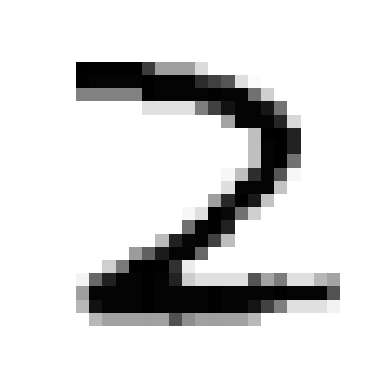

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[7655-1] # Index can be between 0 to 69999!
plot_digit(some_digit)

# Lets see content of target variable

In [11]:
y[7655-1]

2

# Split dataset to train and test

In [12]:
# Write a code to split your dataset into 80/20 dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
#X_train, X_test, y_train, y_test =  X[:60000], X[60000:], y[:60000], y[60000:]


### Verify data dimension

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((56000, 784), (14000, 784), (56000,), (14000,))

# Binary classifier

###Predict if an image is 5 or not.

In [14]:
# if y_train value equals 5, it replaces it with true otherwise false
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
y_train_5.shape

(56000,)

**Note**: a few hyperparameters will have a different default value in future versions of Scikit-Learn, so a warning is issued if you do not set them explicitly. This is why we set `max_iter=5` and `tol=-np.infty`, to get the same results as in the book, while avoiding the warnings.

In [16]:
from sklearn.linear_model import SGDClassifier

#sgd stands for stochastic gradient descent (read more about GSD https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd)
#clf stands for classifier
sgd_clf = SGDClassifier(max_iter=5, tol=None, random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(max_iter=5, random_state=42, tol=None)

### We just built a model. Now lets pass a single image to it and see the response

In [17]:
# See the value of 11th image and corresponding label
print(y_train_5[11])
print(X[11])

True
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  31  40 129 234 234 159   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  68 150 239 2

# How does  above array representing X[11] which is image of 5?

In [18]:
# Predict using the model
pred = sgd_clf.predict([X[19]])
pred[0]

False

# Use Cross Validation Technique

In [19]:
from sklearn.model_selection import cross_val_score

# Fit the model with CS=3
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95510794, 0.9577329 , 0.95773063])

In [20]:
#BaseEstimator is when there is no model!
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [21]:

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9085552 , 0.911823  , 0.90871103])

## As you see accuracy of base model is 90%!

Can you explain it?

In [22]:
# Look at number of times 5 is repeated in the dataset!
import numpy as np

np.unique(y_train_5, return_counts=True)

# As expected, 5 is repeated only 10% of the times. So, even if we never detect it, stil we will have 90% accuracy!


(array([False,  True]), array([50943,  5057]))

In [23]:
np.unique(never_5_clf.predict(X_train), return_counts = True)

(array([False]), array([56000]))

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

#A food for your though:

#### Look at below evaluation results (confusion matrix, Precision and Recall values) and record them in your book. Then change the value of cv in above cell. Either increase or decrese cv and calculate precision and recall again. What do you observe?

#### Can you explain it?

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# Rows are model predictions (0,1)
# Cols are actual y (0,1)

array([[50671,   272],
       [ 2144,  2913]])

In [26]:
y_train_perfect_predictions = y_train_5

# Too good to believe model!!!

In [27]:
confusion_matrix(y_train_perfect_predictions,y_train_5)

array([[50943,     0],
       [    0,  5057]])

# Precision of our SGD model!

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

#2995/(2995+291)

0.9145996860282575

#  Recall of our SGD model

In [29]:
recall_score(y_train_5, y_train_pred)

#2995/(2995+2045)

0.5760332212774372

# F1 score of our model

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# As you see, F1 score penalizes 91% compared to 59% recall

0.7068672652268867

#What is best Precision Recall Ratio?

In [31]:
#
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-697415.11581412])

In [32]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [33]:
y_some_digit_pred

array([False])

In [34]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [35]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [36]:
y_scores_ = sgd_clf.decision_function(X_train)
y_scores_

array([ -22571.18398522, -437276.04058611, -120280.92672451, ...,
        177066.89301861, -345439.80629347, -459266.43912845])

Note: there was an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) in Scikit-Learn 0.19.0 (fixed in 0.19.1) where the result of `cross_val_predict()` was incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array had an extra first dimension full of 0s. Just in case you are using 0.19.0, we need to add this small hack to work around this issue:

In [37]:
y_scores.shape

(56000,)

In [38]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

# Plot Precision/Recall Curve

In [39]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

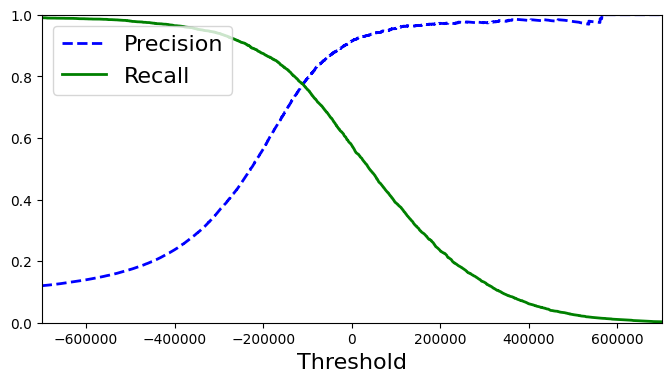

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [41]:
(y_train_pred == (y_scores > 0)).all()

True

In [42]:
y_train_pred_90 = (y_scores > 70000)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9471011426153195

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.4425548744314811

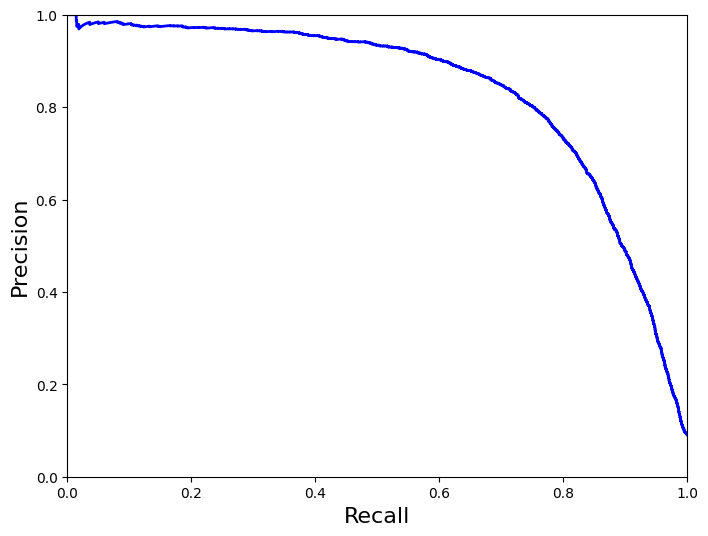

In [45]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

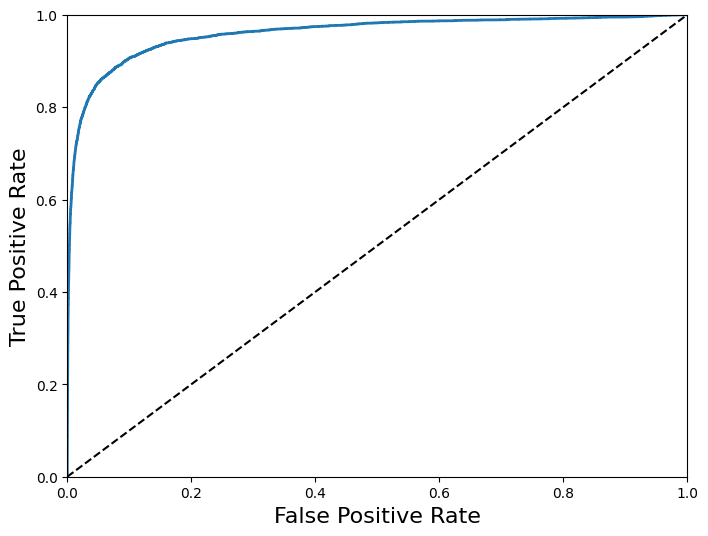

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9599313133848709

**Note**: we set `n_estimators=10` to avoid a warning about the fact that its default value will be set to 100 in Scikit-Learn 0.22.

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [50]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

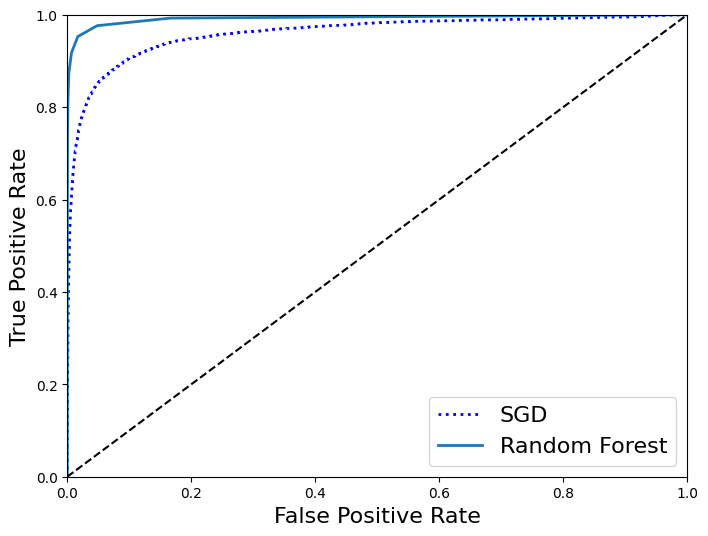

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9923667978655792

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9875150060024009

In [54]:
recall_score(y_train_5, y_train_pred_forest)

0.8133280601146925

# Multiclass classification

In [55]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([2], dtype=int8)

In [56]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -394278.27083259,  -321430.31889931,   479835.78517417,
         -160194.60484538,  -874605.0572452 ,  -647344.51591458,
         -863637.73919711, -1015168.45625471,  -365479.23768075,
         -761417.69841755]])

In [57]:
np.argmax(some_digit_scores)

2

In [58]:
# Look at number of classes for target variable
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [59]:
sgd_clf.classes_[5]

5

In [60]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=None, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([2], dtype=int8)

In [61]:
len(ovo_clf.estimators_)

45

In [62]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([2], dtype=int8)

In [63]:
forest_clf.predict_proba([some_digit])

array([[0. , 0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [64]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84668131, 0.85493116, 0.87570985])

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91171586, 0.9103766 , 0.90881817])

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_traian_pred)
conf_mx

array([[5436,    2,   20,    7,   12,   31,   35,    8,   25,    3],
       [   1, 6072,   38,   21,    5,   42,    9,    7,   91,   10],
       [  51,   30, 5004,   96,   75,   23,   88,   63,  140,   18],
       [  43,   38,  128, 5017,    3,  207,   30,   55,  123,   88],
       [  14,   26,   46,    7, 5020,   13,   53,   29,   64,  186],
       [  77,   43,   35,  174,   77, 4269,  117,   27,  157,   81],
       [  36,   23,   45,    2,   46,   77, 5189,    9,   40,    0],
       [  34,   22,   79,   26,   43,   11,    1, 5406,   14,  212],
       [  52,  144,   71,  137,   18,  140,   52,   25, 4643,  125],
       [  41,   36,   24,   79,  161,   27,    2,  195,   82, 4921]])

In [67]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

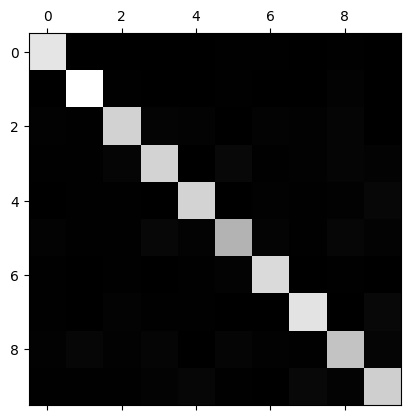

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [69]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

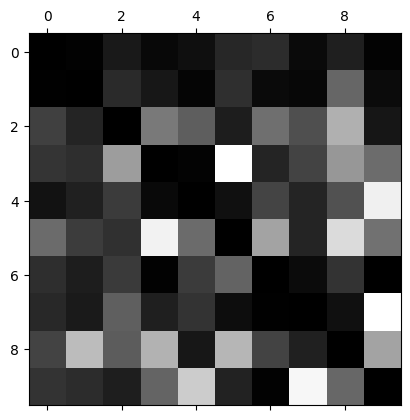

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

## Solution to Assignment 3-2

Binary classification (5 and not 5)

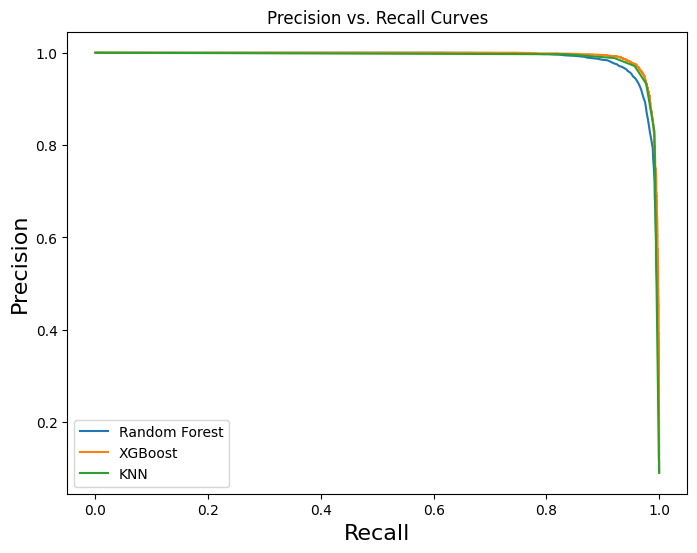

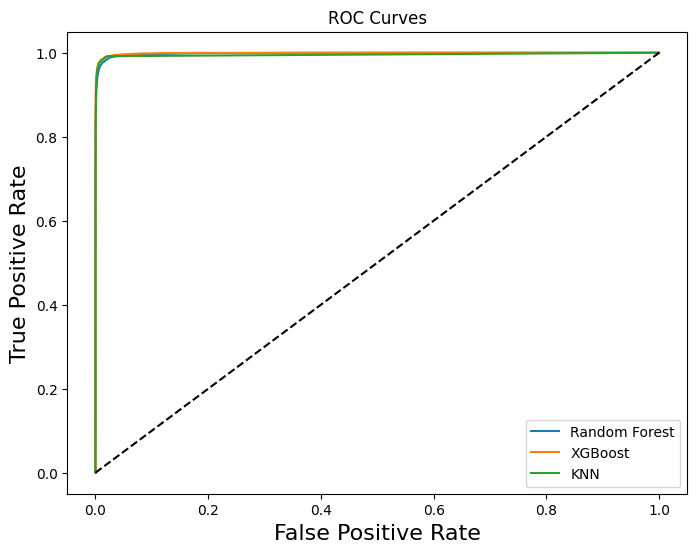

In [78]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

model_results = {}

# Perform cross-validation for each model and store results
for model_name, model in models.items():
    model.fit(X_train, y_train_5)

    # Use predict_proba for models that support it
    y_scores = cross_val_predict(model, X_train, y_train_5, cv=3, method="predict_proba")[:, 1]

    precisions, recalls, _ = precision_recall_curve(y_train_5, y_scores)
    fpr, tpr, _ = roc_curve(y_train_5, y_scores)


    model_results[model_name] = {
        "y_scores": y_scores,
        "precisions": precisions,
        "recalls": recalls,
        "fpr": fpr,
        "tpr": tpr
    }

# Plot Precision vs. Recall Curves for all models
plt.figure(figsize=(8, 6))
for model_name, results in model_results.items():
    plt.plot(results["recalls"], results["precisions"], label=model_name)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.legend()
plt.title("Precision vs. Recall Curves")
plt.show()

# Plot ROC Curves for all models
plt.figure(figsize=(8, 6))
for model_name, results in model_results.items():
    plt.plot(results["fpr"], results["tpr"], label=model_name)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.legend()
plt.title("ROC Curves")
plt.show()



XGBoost: Most stable at higher recall, ideal when maximizing recall is crucial.

Random Forest: Close to XGBoost but with a sharper precision drop at high recall.

KNN: Strong performance but slightly less consistent in precision.

Multi-class Classification

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Cross-validation and evaluation for 10-label classification
model_results = {}

for model_name, model in models.items():
    # Cross-validate model
    accuracy_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy")
    print(f"{model_name} accuracy scores: {accuracy_scores}")

    # Get cross-validated predictions
    y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=3)

    # Compute confusion matrix
    conf_mx = confusion_matrix(y_train, y_train_pred)
    model_results[model_name] = {
        "accuracy_scores": accuracy_scores,
        "confusion_matrix": conf_mx
    }

Random Forest accuracy scores: [0.9633578  0.96512562 0.96651666]
XGBoost accuracy scores: [0.97455403 0.97273263 0.97535626]
KNN accuracy scores: [0.93823325 0.9390368  0.94267652]


Random Forest Confusion Matrix:


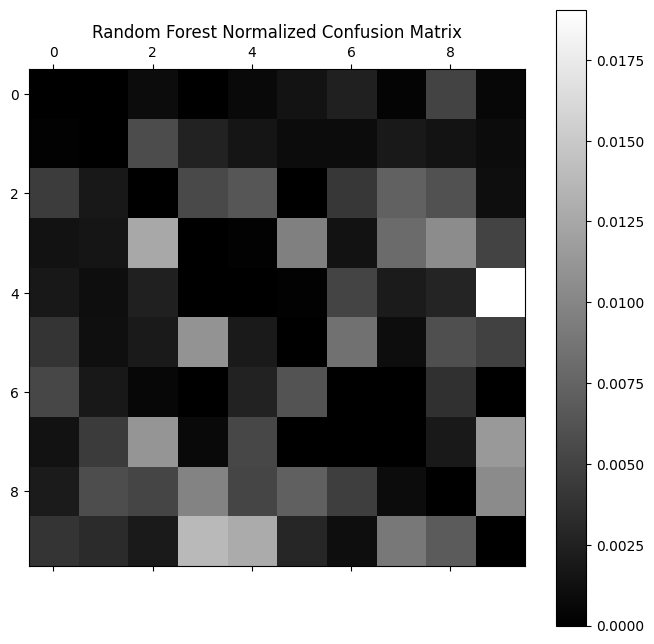

XGBoost Confusion Matrix:


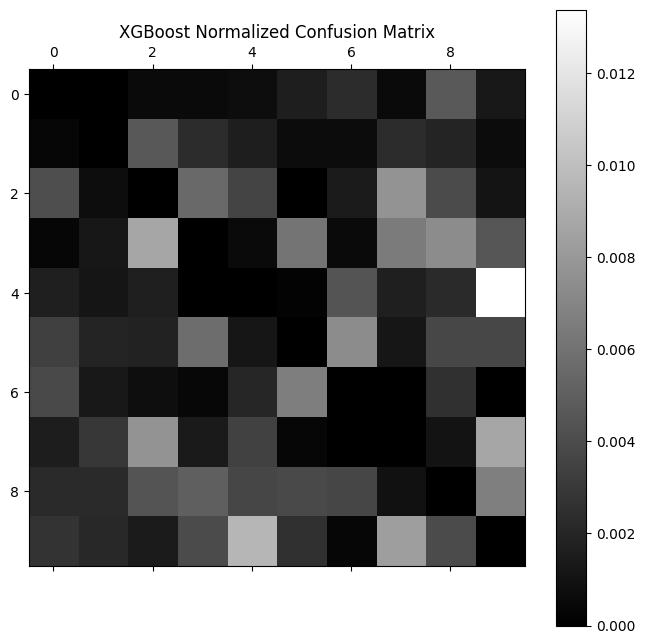

KNN Confusion Matrix:


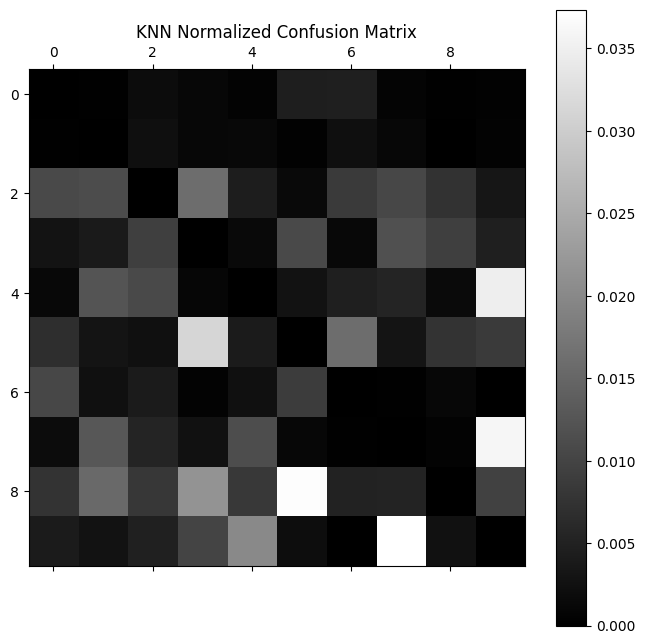

In [81]:
def plot_confusion_matrix(matrix, title="Confusion Matrix"):
    """Plot the confusion matrix with a colorbar."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, cmap=plt.cm.gray)
    fig.colorbar(cax)
    plt.title(title)
    plt.show()

# Plot and analyze confusion matrices for each model
for model_name, results in model_results.items():
    print(f"{model_name} Confusion Matrix:")
    conf_mx = results["confusion_matrix"]

    # Normalize the confusion matrix for visualization
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)

    # Plot normalized confusion matrix
    plot_confusion_matrix(norm_conf_mx, title=f"{model_name} Normalized Confusion Matrix")

As you can see XGBoost works best on multi-class classification, while KNN showed worst accuracy.

From confusion matrices, we can see that sometimes KNN misclassifies 5 as 3, 8 as 5, 9 as 7, 7 as 9 and 4 as 9